<a href="https://colab.research.google.com/github/IVMRanepa/AI-to-help-students-and-teachers/blob/main/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%B7%D0%B0%D1%89%D0%B8%D1%82%D1%8B_%D0%B8_%D1%80%D0%B5%D0%B0%D0%B3%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BD%D0%B0_%D0%B8%D0%BD%D1%86%D0%B8%D0%B4%D0%B5%D0%BD%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

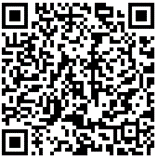

# 📘 **Модуль 4. Методы защиты и реагирования на инциденты**
  🎯 **Цели модуля:**

Понять различия уровней защиты (сеть, сервис, инфраструктура).

Научиться связывать угрозы с методами защиты.

Научиться реагировать на инциденты: выявление → анализ → локализация → восстановление.

Рассмотреть практические примеры (демонстрации с синтетическими данными в Colab).

1. Защита уровня сети

🔑 Основные угрозы:

Сканирование портов, DDoS, ARP-спуфинг, DNS-туннелирование, утечка данных через сеть.

🛡 Методы защиты:

Межсетевые экраны (firewalls), IDS/IPS.

Анализ NetFlow и DNS-логов.

Сегментация сети, контроль доступа на уровне L2/L3.

Реагирование: изоляция подозрительного узла, блокировка MAC/IP, уведомление SOC.

📌 Демонстрации:

N1. NetFlow-анализ → поиск аномального объёма трафика (утечка).

N2. DNS-туннелинг (энтропия поддоменов) → обнаружение скрытых каналов.

N3. ARP-анализ → выявление спуфинга.

💡 Вывод: даже простые статистические и сигнатурные методы позволяют оперативно выявлять подозрительное поведение.

2. Защита уровня сервиса

🔑 Основные угрозы:

SQL-инъекции, XSS, подмена ссылок, злоупотребление веб-формами.

Использование сервисов для социальной инженерии (фейковые ссылки, поддельные почтовые уведомления).

🛡 Методы защиты:

Безопасная разработка: валидация входных данных, принцип «минимальных привилегий».

Web Application Firewall (WAF).

Логирование и мониторинг обращений.

Реагирование: временная блокировка атакующего IP, анализ логов, уведомление разработчиков.

📌 Демонстрации:

S1. Фаззинг веб-форм → показ, как неожиданный ввод ломает приложение.

S2. Логи с SQL-инъекциями → выявление по регулярным выражениям.

S3. Анализ подозрительных URL → проверка на obfuscation (punycode, IP в домене).

💡 Вывод: сервисы должны быть защищены не только технически (WAF), но и организационно (регулярные пентесты, обучение сотрудников).

3. Защита уровня инфраструктуры

🔑 Основные угрозы:

Устаревшие ОС и ПО.

Дефолтные пароли на сервисах (SSH/FTP).

Утечки через систему резервного копирования.

🛡 Методы защиты:

Управление обновлениями (patch management).

Аудит учётных записей, отключение дефолтных/ненужных сервисов.

Контроль резервных копий (целостность, аномалии по размеру/времени).

Реагирование: срочное обновление уязвимых систем, сброс/смена паролей, проверка целостности бэкапов.

📌 Демонстрации:

I1. Проверка устаревших версий → выявление хостов с риском.

I2. Дефолтные учётные данные → поиск слабых паролей.

I3. Мониторинг резервных копий → обнаружение подозрительной активности (exfil).

💡 Вывод: инфраструктурная защита требует дисциплины — регулярных проверок и автоматизации (скрипты аудита, CMDB).

**Защита уровня сети — демонстрации (Network-level)**
**Демонстрация N1 — «Аномалия трафика (симуляция NetFlow) — детектор объёма»**

**Цель:** показать, как простая статистика (mean+3σ) помогает обнаружить подозрительные сессии/утечку.

Threshold (KB): 1808.8
Suspicious sessions: 10


,session_kb,suspicious
1000,6119.484349,True
1008,5839.642172,True
1001,5739.706946,True
1006,5716.154576,True
1004,5558.578651,True
1007,5508.137441,True
1005,5314.788308,True
1002,5047.704296,True
1009,4571.811831,True
1003,4482.450578,True


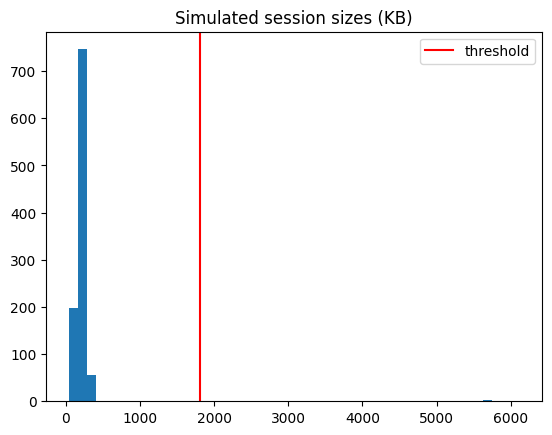

In [9]:
# Colab-ready: Network anomaly (NetFlow-like) simulation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(42)
# Генерируем 1000 обычных сессий (KB transfer), и 10 аномалий (утечка)
normal = np.random.normal(loc=200, scale=50, size=1000)  # обычный трафик (KB)
anomalies = np.random.normal(loc=5000, scale=800, size=10)  # утечки/эксфильтрация
data = np.concatenate([normal, anomalies])
df = pd.DataFrame({"session_kb": data})
# Простое правило: > mean + 3*std = подозрительно
threshold = df['session_kb'].mean() + 3*df['session_kb'].std()
df['suspicious'] = df['session_kb'] > threshold
print("Threshold (KB):", round(threshold,1))
print("Suspicious sessions:", df['suspicious'].sum())
display(df.sort_values('session_kb', ascending=False).head(10))
plt.hist(df['session_kb'], bins=50)
plt.axvline(threshold, color='r', label='threshold')
plt.title("Simulated session sizes (KB)")
plt.legend()
plt.show()

**Комментарий / выводы:** простая статистика быстро показывает выбросы; в реальной сети — дополнить корреляциями по IP/портам, частоте, времени. Используется как первый уровень обнаружения перед детальной эвристикой.

**Демонстрация N2 — «Обнаружение DNS-туннелирования через энтропию поддоменов»**

**Цель:** показать метод обнаружения «стеганографии в DNS» по высокой энтропии имени узла.

In [10]:
# Colab-ready: DNS tunneling detector (synthetic)
import math, random, string
import pandas as pd
from collections import Counter

def shannon_entropy(s):
    probs = [n/len(s) for n in Counter(s).values()]
    return -sum(p*math.log2(p) for p in probs) if probs else 0

# Сгенерируем доменные имена: нормальные и с высокой энтропией
normal = ["hr.company.example","login.company.example","assets.cdn.example"]
tunnel = ["".join(random.choices(string.ascii_lowercase+string.digits, k=40)) + ".exfil.example" for _ in range(8)]
names = normal + tunnel
df = pd.DataFrame({"name": names})
df['label'] = ['normal' if n in normal else 'tunnel' for n in names]
df['subdomain'] = df['name'].apply(lambda s: s.split('.')[0])
df['entropy'] = df['subdomain'].apply(shannon_entropy)
print(df[['name','entropy','label']])
print("\nPotential tunnels (entropy > 3.5):")
display(df[df['entropy']>3.5])

                                                 name   entropy   label
0                                  hr.company.example  1.000000  normal
1                               login.company.example  2.321928  normal
2                                  assets.cdn.example  1.792481  normal
3   9wvwu48j9ow5r7zoeod1gtos7y8hh5kcxb7bb54u.exfil...  4.396439  tunnel
4   wio1w0lsi9lpsm5j0rfalj2g8sqai5ritjvmi1s3.exfil...  4.243943  tunnel
5   829deue8ygpm5sddyb9lw87k3eq7kr37x4mhm4s4.exfil...  4.358695  tunnel
6   kln1qzaeq6rc3ev156lyen23yid7ihs5rqctw5og.exfil...  4.515312  tunnel
7   hs4nid7ekknii1p8ydyqgp8lahiaqvav8tex8ctp.exfil...  4.234184  tunnel
8   weui3o72lx6wr9fhunfa28dph7n4ue9oixerj5f7.exfil...  4.396439  tunnel
9   qjiuors9t6xij2nklabxg6krcoqq5mhbfjburt92.exfil...  4.396439  tunnel
10  mwk63v4vf8gqlpp539z6um85688jc7s8gqckehkw.exfil...  4.343943  tunnel

Potential tunnels (entropy > 3.5):


,name,label,subdomain,entropy
3,9wvwu48j9ow5r7zoeod1gtos7y8hh5kcxb7bb54u.exfil...,tunnel,9wvwu48j9ow5r7zoeod1gtos7y8hh5kcxb7bb54u,4.396439
4,wio1w0lsi9lpsm5j0rfalj2g8sqai5ritjvmi1s3.exfil...,tunnel,wio1w0lsi9lpsm5j0rfalj2g8sqai5ritjvmi1s3,4.243943
5,829deue8ygpm5sddyb9lw87k3eq7kr37x4mhm4s4.exfil...,tunnel,829deue8ygpm5sddyb9lw87k3eq7kr37x4mhm4s4,4.358695
6,kln1qzaeq6rc3ev156lyen23yid7ihs5rqctw5og.exfil...,tunnel,kln1qzaeq6rc3ev156lyen23yid7ihs5rqctw5og,4.515312
7,hs4nid7ekknii1p8ydyqgp8lahiaqvav8tex8ctp.exfil...,tunnel,hs4nid7ekknii1p8ydyqgp8lahiaqvav8tex8ctp,4.234184
8,weui3o72lx6wr9fhunfa28dph7n4ue9oixerj5f7.exfil...,tunnel,weui3o72lx6wr9fhunfa28dph7n4ue9oixerj5f7,4.396439
9,qjiuors9t6xij2nklabxg6krcoqq5mhbfjburt92.exfil...,tunnel,qjiuors9t6xij2nklabxg6krcoqq5mhbfjburt92,4.396439
10,mwk63v4vf8gqlpp539z6um85688jc7s8gqckehkw.exfil...,tunnel,mwk63v4vf8gqlpp539z6um85688jc7s8gqckehkw,4.343943


**Комментарий / выводы:** высокая энтропия в поддомене — признак туннелирования/обфускации. В продакшн: собрать статистику по всем DNS-запросам, строить порог на основе исторических данных.

In [17]:
%%html
<iframe width="720" height="405" src="https://rutube.ru/play/embed/cd0763b78a2e350c69645b2fc1f6c30a/" style="border: none;" allow="clipboard-write; autoplay" webkitAllowFullScreen mozallowfullscreen allowFullScreen></iframe>

**Демонстрация N3 — «Симуляция ARP-аномалий (gratuitous ARP)»**

**Цель:** продемонстрировать признаки ARP-спуфинга (много повторяющихся ARP-ответов с разных MAC).

In [11]:
# Colab-ready: ARP spoofing simulation (synthetic)
import pandas as pd
import random

# Генерируем таблицу ARP события: timestamp, ip, mac
ips = [f"192.168.1.{i}" for i in range(2,50)]
events = []
for t in range(1000):
    ip = random.choice(ips)
    # нормальное: стабильный mac per ip; атака: один ip сменяет mac часто
    if random.random()<0.01:  # редкая смена — симулируем спуфинг
        mac = "AA:BB:CC:DD:EE:" + f"{random.randint(0,255):02X}"
    else:
        mac = "00:11:22:33:44:" + f"{(int(ip.split('.')[-1])):02X}"
    events.append((t, ip, mac))
df = pd.DataFrame(events, columns=['t','ip','mac'])
# Детектор: ip с более чем N macs за окно
counts = df.groupby('ip')['mac'].nunique().reset_index(name='mac_count')
suspicious = counts[counts['mac_count']>1]
print("IPs with multiple MACs observed:")
display(suspicious.head())

IPs with multiple MACs observed:


,ip,mac_count
2,192.168.1.12,2
5,192.168.1.15,2
6,192.168.1.16,2
15,192.168.1.24,3
16,192.168.1.25,2


**Комментарий / выводы:** при выявлении нескольких MAC для одного IP — триггерить расследование (включая проверку по switch CAM, port mapping). Это учебная симуляция; реальные датасеты берутся из сетевого зеркалирования.

**Защита уровня сервиса — демонстрации (Service-level)**
**Демонстрация S1 — «Фаззинг веб-формы (без реального сервера)»**

**Цель**: показать, как фаззинг входных данных помогает найти ошибки/исключения в парсере — безопасная локальная симуляция. (Связь с главой о фаззинге в книге.)

In [ ]:
# Colab-ready: Safe fuzzing for web-form parser (local function)
import random, string

def vulnerable_parse(inp):
    # имитируем уязвимую функцию: бросает ошибку при длинных/неожиданных символах
    if len(inp) > 50:
        raise ValueError("input too long")
    if any(c in inp for c in "\x00"):
        raise RuntimeError("null byte found")
    return {"ok":True, "len":len(inp)}

# Простая стратегия фаззинга
def random_string(n):
    return ''.join(random.choice(string.printable) for _ in range(n))

for i in range(200):
    test = random_string(random.randint(1,80))
    try:
        vulnerable_parse(test)
    except Exception as e:
        print("Crash found! len=", len(test), "error=", e)
        break

Crash found! len= 67 error= input too long


**Комментарий / выводы:** даже простая тестовая логика показывает уязвимости; в продакшн расширяют словари и используют coverage-guided fuzzers.

**Демонстрация S2 — «Имитация SQL-Injection логов + детектор»**

**Цель**: сгенерировать лог веб-форм с «подозрительными» payload'ами и продемонстрировать правило обнаружения (regex). (Книга обсуждает инъекции и HTTP-логи).

In [12]:
# Colab-ready: Simulate web logs with SQLi attempts and detect by regex
import pandas as pd, random

payloads = ["1' OR '1'='1", "'; DROP TABLE users; --", "normal_input", "admin' --"]
logs = []
for i in range(200):
    user = f"user{random.randint(1,50)}"
    inp = random.choice(payloads if random.random()<0.1 else ["hello","report","123"])
    logs.append({"ts": i, "user": user, "input": inp})

df = pd.DataFrame(logs)
# Простая детекция SQLI
import re
sqli_re = re.compile(r"('.+--|OR\s+1=1|DROP\s+TABLE|;)")
df['sqli'] = df['input'].apply(lambda s: bool(sqli_re.search(s.upper())))
print("Detected SQLi attempts:", df['sqli'].sum())
display(df[df['sqli']])

Detected SQLi attempts: 8


,ts,user,input,sqli
6,6,user33,'; DROP TABLE users; --,True
63,63,user9,admin' --,True
143,143,user47,admin' --,True
144,144,user45,'; DROP TABLE users; --,True
150,150,user20,admin' --,True
163,163,user40,'; DROP TABLE users; --,True
174,174,user29,'; DROP TABLE users; --,True
180,180,user1,admin' --,True


**Комментарий / выводы:** правильно настроенные WAF/лог-анализаторы — распознают такие паттерны; для учебных целей — показываем false positives и необходимость контекстного анализа.

**Демонстрация S3 — «Сканер обфусцированных URL в почтовых сообщениях»**

**Цель**: расширить предыдущую идею URL-анalyzer (демонстрация 6/ earlier) и показать, как вычислять признаки (punycode, long subdomain, IP-address in host).

In [13]:
# Colab-ready: Email URL obfuscation scanner (synthetic)
import pandas as pd, re

urls = [
 "http://paypa1.com/login",
 "https://secure-login.paypal.com.example",
 "http://xn--pple-43d.com",  # punycode-like
 "https://192.168.1.5/login",
 "https://company.example/login"
]
df = pd.DataFrame({"url": urls})
def url_features(u):
    return {
        "has_ip": bool(re.search(r"https?://\d+\.\d+\.\d+\.\d+", u)),
        "punycode": "xn--" in u,
        "dot_count": u.count("."),
        "digit_in_domain": bool(re.search(r"https?://[^/]*\d", u))
    }
f = pd.DataFrame([url_features(u) for u in df['url']])
res = pd.concat([df,f], axis=1)
display(res)

,url,has_ip,punycode,dot_count,digit_in_domain
0,http://paypa1.com/login,False,False,1,True
1,https://secure-login.paypal.com.example,False,False,3,False
2,http://xn--pple-43d.com,False,True,1,True
3,https://192.168.1.5/login,True,False,3,True
4,https://company.example/login,False,False,1,False


**Комментарий / выводы:** объединять такие признаки в скоринговую функцию — простой способ выделять подозрительные ссылки до ручной проверки.

**Защита уровня инфраструктуры — демонстрации (Infrastructure-level)**

**Демонстрация I1 — «Симуляция сканирования устаревших версий ПО»**

**Цель:** показать, как идентифицировать хосты с устаревшими пакетами (на синтетическом inventory). Книга обсуждает важность обновлений.

In [14]:
# Colab-ready: Simulate inventory and outdated versions detector
import pandas as pd

hosts = [
 {"host":"host1","os":"Ubuntu","version":"20.04"},
 {"host":"host2","os":"Ubuntu","version":"16.04"},
 {"host":"host3","os":"CentOS","version":"7.9"},
 {"host":"host4","os":"Windows","version":"2012"}
]
df = pd.DataFrame(hosts)
# Правила: устаревшие версии (для демонстрации)
df['outdated'] = df.apply(lambda r: (r['os']=="Ubuntu" and r['version']<"18.04") or (r['os']=="Windows" and r['version']=="2012"), axis=1)
display(df)
print("Outdated hosts:", df['outdated'].sum())

,host,os,version,outdated
0,host1,Ubuntu,20.04,False
1,host2,Ubuntu,16.04,True
2,host3,CentOS,7.9,False
3,host4,Windows,2012,True


Outdated hosts: 2


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('host').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('os').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('version').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('outdated').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['os'].value_counts()
    for x_label, grp in df.groupby('host')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('host')
_ = plt.ylabel('os')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['version'].value_counts()
    for x_label, grp in df.groupby('os')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('os')
_ = plt.ylabel('version')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['outdated'].value_counts()
    for x_label, grp in df.groupby('version')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('version')
_ = plt.ylabel('outdated')

**Комментарий / выводы:** инвентаризация + автоматизированные проверки — основа инфраструктурной безопасности; в реальном мире интегрировать с CMDB/patch management.

**Демонстрация I2 — «Имитация поиска хостов с дефолтными SSH/FTP логинами»**

**Цель:** проиллюстрировать риск открытых/дефолтных аккаунтов — анализ синтетического списка сервисов (в книге примеры default creds/FTP).

In [15]:
# Colab-ready: Simulate default credentials detection (synthetic)
import pandas as pd

services = [
 {"host":"10.0.0.2","service":"ssh","user":"root","pass":"toor"},
 {"host":"10.0.0.3","service":"ssh","user":"admin","pass":"S3cur3"},
 {"host":"10.0.0.4","service":"ftp","user":"ftp","pass":"ftp"},
 {"host":"10.0.0.5","service":"ssh","user":"user","pass":"password"}
]
df = pd.DataFrame(services)
# Список известных опасных default credentials (демонстрация)
defaults = [("root","toor"),("ftp","ftp"),("admin","admin"),("user","password")]
df['is_default'] = df.apply(lambda r: (r['user'], r['pass']) in defaults, axis=1)
display(df)
print("Default/weak credentials found:", df['is_default'].sum())

,host,service,user,pass,is_default
0,10.0.0.2,ssh,root,toor,True
1,10.0.0.3,ssh,admin,S3cur3,False
2,10.0.0.4,ftp,ftp,ftp,True
3,10.0.0.5,ssh,user,password,True


Default/weak credentials found: 3


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('host').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('service').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('user').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('pass').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('host')):
  _plot_series(series, series_name, i)
  fig.legend(title='host', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('service')):
  _plot_series(series, series_name, i)
  fig.legend(title='service', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('user')):
  _plot_series(series, series_name, i)
  fig.legend(title='user', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pass')):
  _plot_series(series, series_name, i)
  fig.legend(title='pass', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['service'].value_counts()
    for x_label, grp in _df_10.groupby('host')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('host')
_ = plt.ylabel('service')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['user'].value_counts()
    for x_label, grp in _df_11.groupby('service')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('service')
_ = plt.ylabel('user')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pass'].value_counts()
    for x_label, grp in _df_12.groupby('user')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('user')
_ = plt.ylabel('pass')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['is_default'].value_counts()
    for x_label, grp in _df_13.groupby('pass')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pass')
_ = plt.ylabel('is_default')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['host'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='index', y='host', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['service'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='service', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['user'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='user', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['pass'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='pass', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Комментарий / выводы:** демонстрирует, как инвентаризация/сканирование учетных данных (внутри легитимного процесса управления) помогает выявлять слабые настройки; никогда не выполнять brute-force/попытки входа без согласия.

**Демонстрация I3 — «Проверка резервных копий и подозрительной активности exfil (логика)»**

**Цель**: показать, как обнаруживать аномалии в расписании бэкапов и больших скачиваниях. (см. демонстрация N1 и 7 выше).

In [16]:
# Colab-ready: Backup integrity / exfil simulation
import pandas as pd, numpy as np
np.random.seed(0)
# Сгенерируем расписание резервных копий (размеры КБ) и редкие большие скачивания
dates = pd.date_range("2025-01-01", periods=30)
backup_sizes = np.random.normal(50000, 3000, size=30)  # нормальные бэкапы
exfil = backup_sizes.copy()
exfil[5] = 500000  # подозрительный скачок
df = pd.DataFrame({"date": dates, "backup_kb": exfil})
threshold = df['backup_kb'].mean() + 4*df['backup_kb'].std()
df['suspicious'] = df['backup_kb'] > threshold
display(df)
print("Suspicious backup events:", df['suspicious'].sum())

,date,backup_kb,suspicious
0,2025-01-01,55292.157038,False
1,2025-01-02,51200.471625,False
2,2025-01-03,52936.213952,False
3,2025-01-04,56722.679598,False
4,2025-01-05,55602.673970,False
5,2025-01-06,500000.000000,True
6,2025-01-07,52850.265253,False
7,2025-01-08,49545.928375,False
8,2025-01-09,49690.343445,False
9,2025-01-10,51231.795506,False


Suspicious backup events: 1


from matplotlib import pyplot as plt
_df_18['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['backup_kb'].plot(kind='hist', bins=20, title='backup_kb')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('suspicious').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='index', y='backup_kb', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['backup_kb']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('suspicious')):
  _plot_series(series, series_name, i)
  fig.legend(title='suspicious', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('backup_kb')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('suspicious')):
  _plot_series(series, series_name, i)
  fig.legend(title='suspicious', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['backup_kb']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('suspicious')):
  _plot_series(series, series_name, i)
  fig.legend(title='suspicious', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('backup_kb')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('suspicious')):
  _plot_series(series, series_name, i)
  fig.legend(title='suspicious', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_26['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['backup_kb'].plot(kind='line', figsize=(8, 4), title='backup_kb')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['suspicious'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='index', y='suspicious', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['suspicious'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='backup_kb', y='suspicious', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Комментарий / выводы:** автоматические алерты по отклонению размеров/времени бэкапов — критически важны; в докладе добавить timeline и рекомендации (изолировать хост, проверить доступы).